# Principal Component Analysis with Cancer Data

In [285]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [286]:
cancer = pd.read_csv('breast-cancer-wisconsin-data.csv') 
cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [287]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [288]:
print (cancer.describe())
print (cancer.shape)

                 ID  ClumpThickness   Cell Size  Cell Shape  \
count  6.990000e+02      699.000000  699.000000  699.000000   
mean   1.071704e+06        4.417740    3.134478    3.207439   
std    6.170957e+05        2.815741    3.051459    2.971913   
min    6.163400e+04        1.000000    1.000000    1.000000   
25%    8.706885e+05        2.000000    1.000000    1.000000   
50%    1.171710e+06        4.000000    1.000000    1.000000   
75%    1.238298e+06        6.000000    5.000000    5.000000   
max    1.345435e+07       10.000000   10.000000   10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Normal Nucleoli  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.438364   
min             1.000000                     1.000000         1.000000   
25%             1.000000                     2.000000         

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [289]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
cancer.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [290]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
#cancer['Bare Nuclei'].unique()
cancer['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [291]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [292]:
data2 = cancer['Bare Nuclei']
print (data2.mode())


cancer['Bare Nuclei'].replace('?', data2.mode()[0], inplace=True)

0    1
dtype: object


In [293]:
cancer['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [294]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [295]:
%matplotlib inline


cancer['Bare Nuclei'] = pd.to_numeric(cancer['Bare Nuclei'])


In [296]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [297]:
data2 = cancer
dups = data2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Number of rows before discarding duplicates = %d' % (data2.shape[0]))
data2 = data2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of duplicate rows = 9
Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 690


                                   ID  ClumpThickness  Cell Size  Cell Shape  \
ID                           1.000000       -0.059592  -0.043856   -0.042803   
ClumpThickness              -0.059592        1.000000   0.643173    0.653589   
Cell Size                   -0.043856        0.643173   1.000000    0.905349   
Cell Shape                  -0.042803        0.653589   0.905349    1.000000   
Marginal Adhesion           -0.066771        0.487715   0.712933    0.690782   
Single Epithelial Cell Size -0.048102        0.517253   0.746982    0.714243   
Bare Nuclei                 -0.091832        0.590648   0.684571    0.704165   
Normal Nucleoli             -0.059802        0.561063   0.759632    0.738576   
Bland Chromatin             -0.054517        0.535507   0.727073    0.724519   
Mitoses                     -0.036286        0.350196   0.459918    0.440435   
Class                       -0.080084        0.716812   0.817586    0.817551   

                             Marginal A

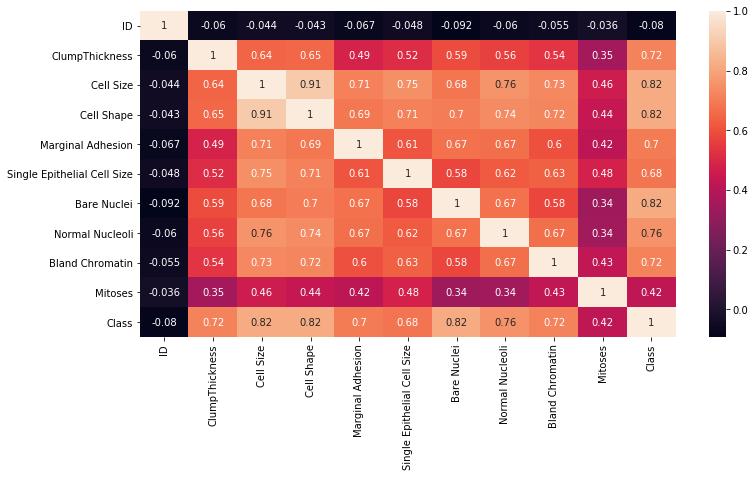

In [298]:
# Check for correlation of variable
print (data2.corr())
plt.figure(figsize=(12,6))
sns.heatmap(data2[data2.columns[0:]].corr(),annot=True)

Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
and bland chromatin
Target variable shows high correlation with most of these variables


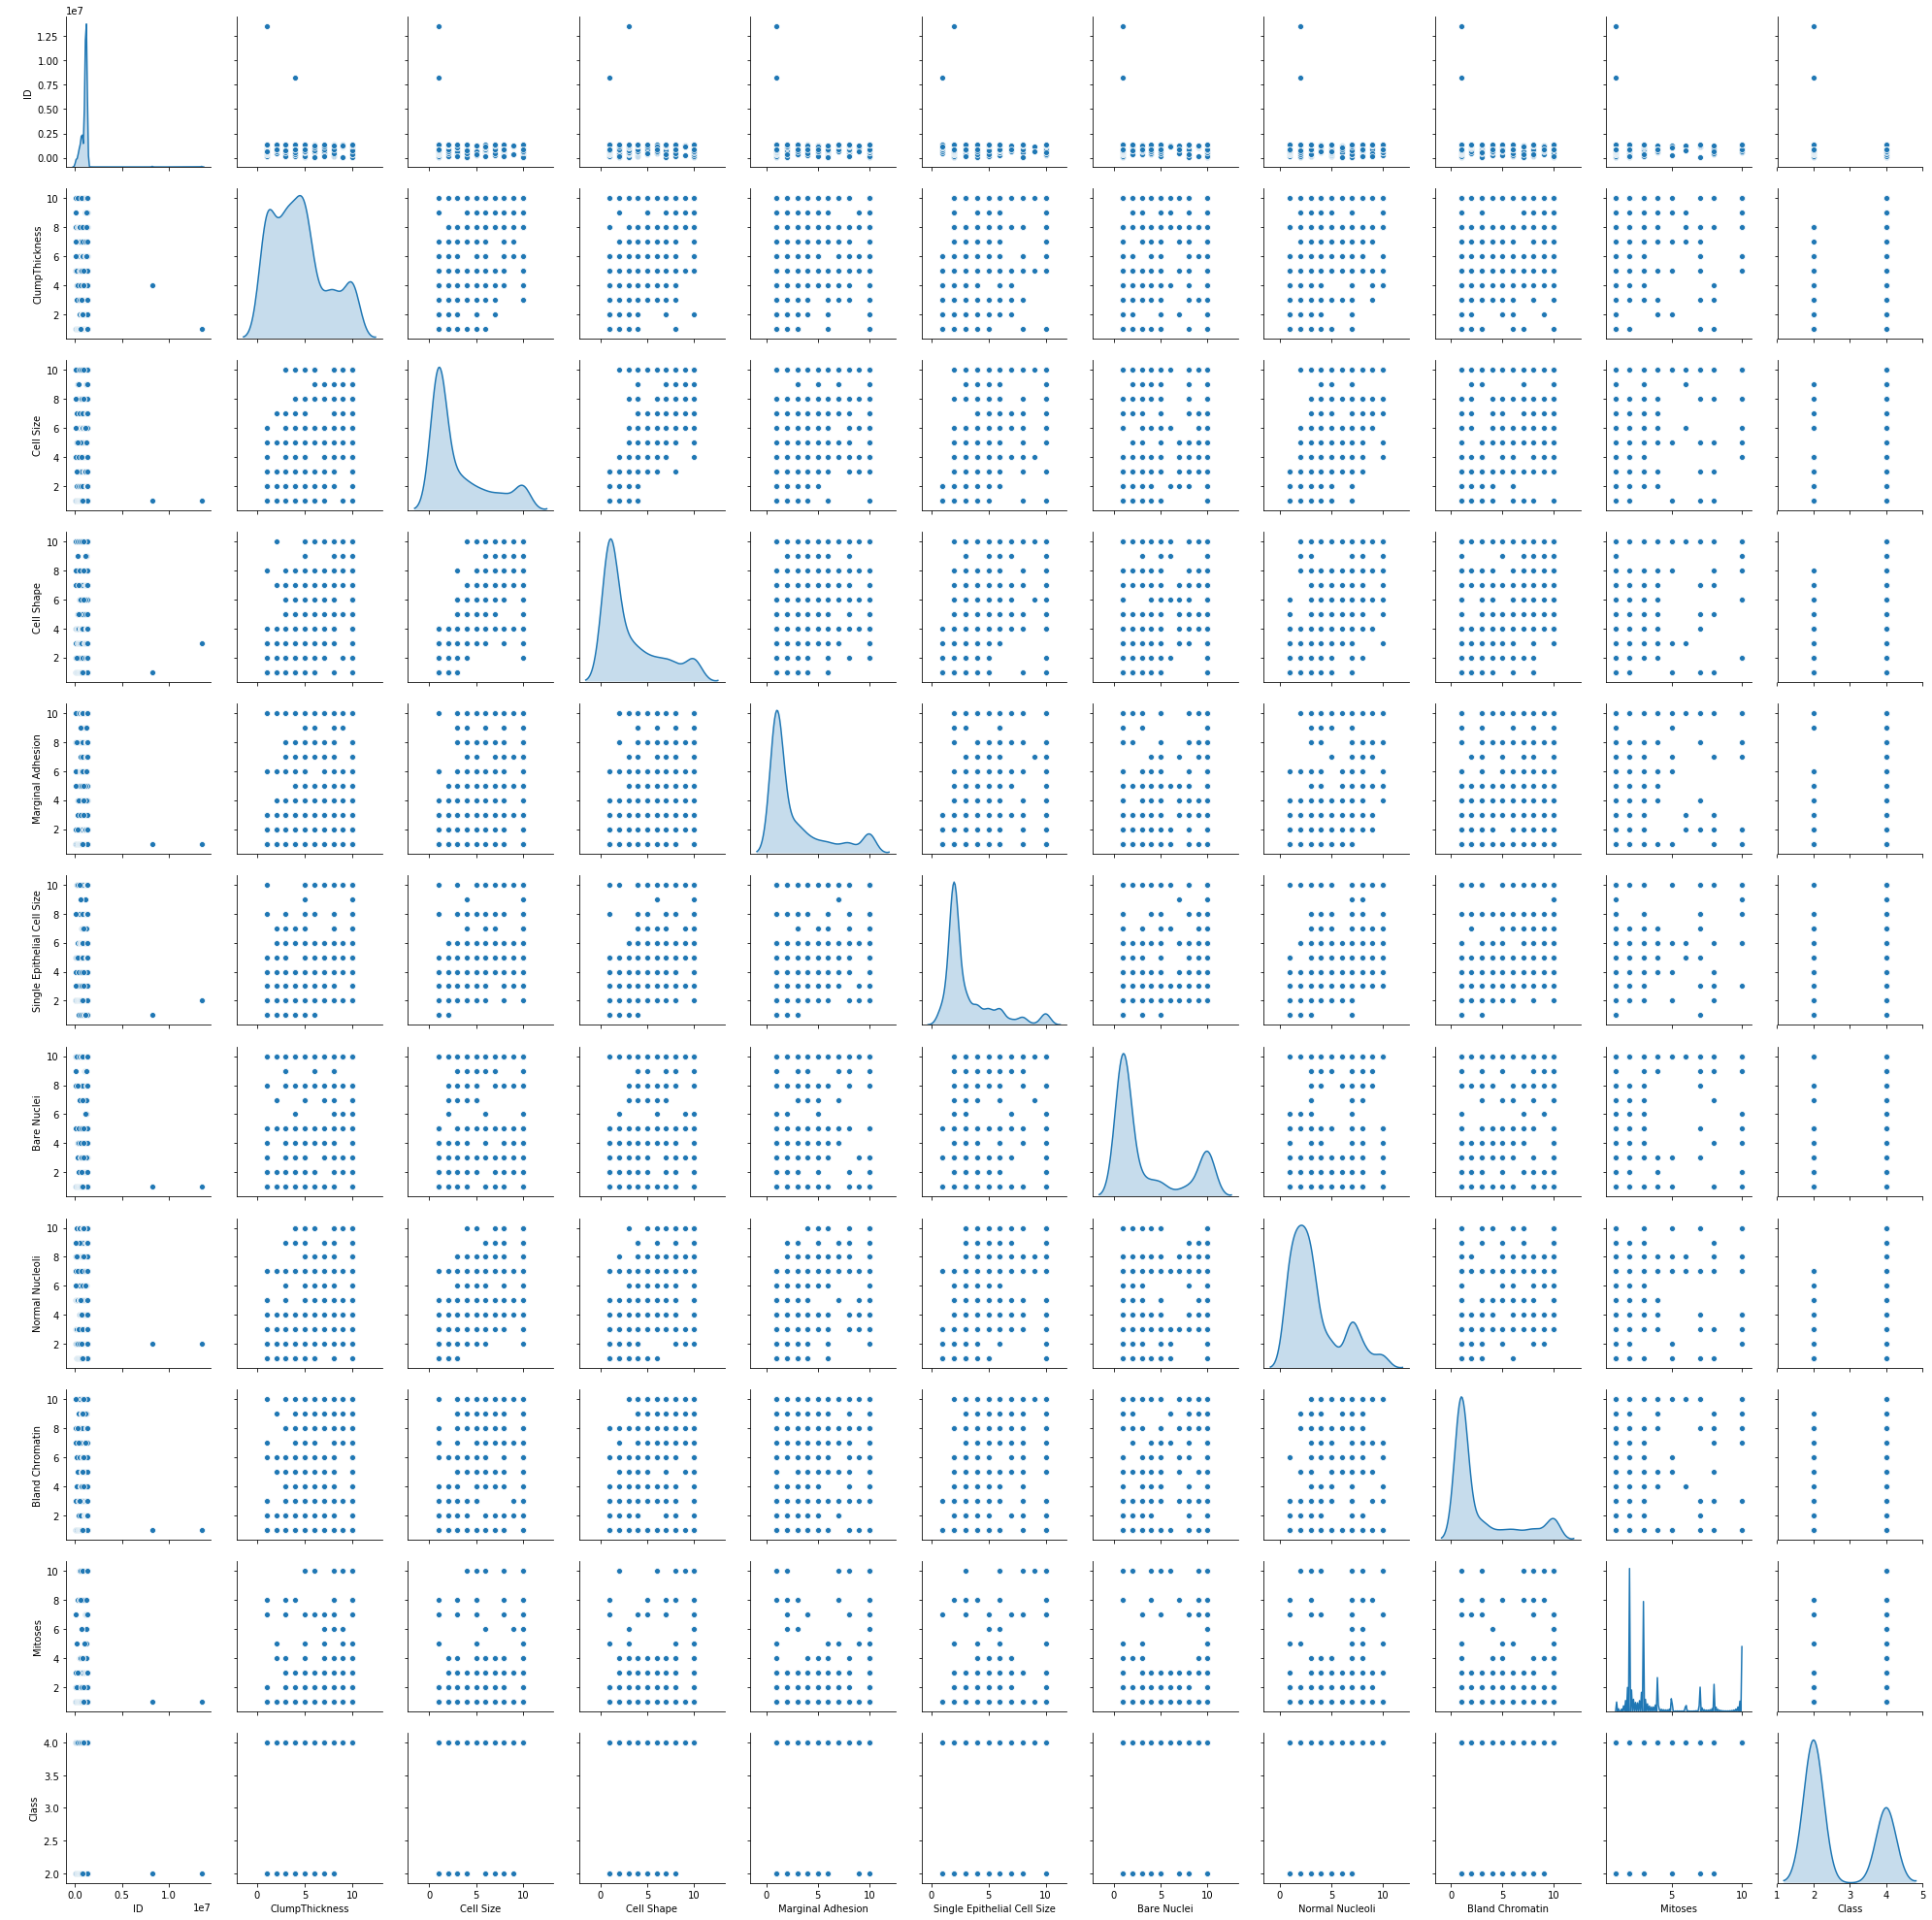

In [299]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
# Seaborn visualization library
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data2,diag_kind = 'kde')

In [300]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [301]:
# We could see most of the outliers are now removed.

In [302]:
data2= data2.drop(['ID'],axis=1)

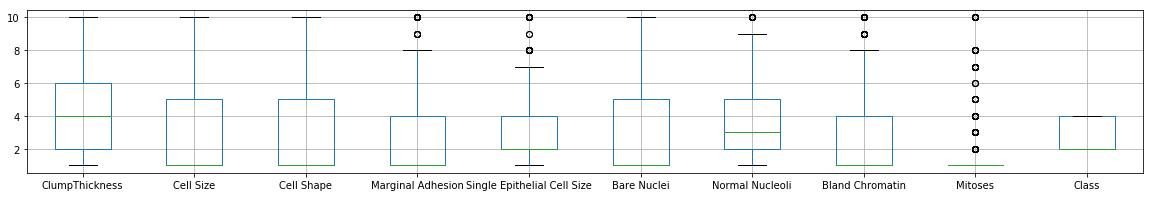

In [303]:
data2.boxplot(figsize=(20,3))

In [304]:
data2['Marginal Adhesion'] = np.where(data2['Marginal Adhesion']>8,6,data2['Marginal Adhesion'])
data2['Single Epithelial Cell Size'] = np.where(data2['Single Epithelial Cell Size']>7,4,data2['Single Epithelial Cell Size'])
data2['Normal Nucleoli'] = np.where(data2['Normal Nucleoli']>9,7,data2['Normal Nucleoli'])
data2['Bland Chromatin'] = np.where(data2['Bland Chromatin']>8,7,data2['Bland Chromatin'])
data2['Mitoses'] = np.where(data2['Mitoses']>3,3,data2['Mitoses'])

In [331]:
X1 = data2.drop(['Class'], axis = 1)


In [332]:
X1

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,3
9,4,2,1,1,2,1,2,1,1


In [318]:
X = data2.drop(columns="Class").values
y = data2["Class"].values

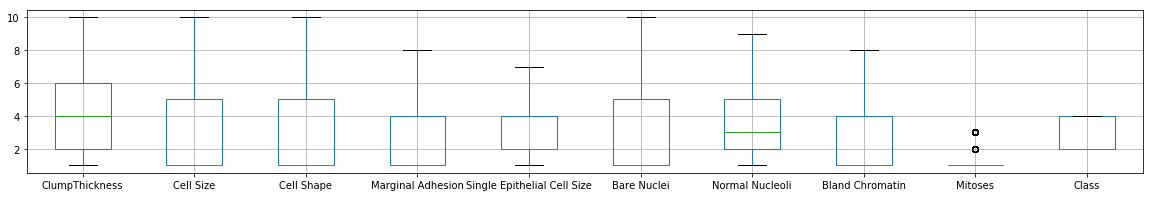

In [319]:
data2.boxplot(figsize=(20,3))


In [334]:
from scipy.stats import zscore
X_Scaled = zscore(X1)

# Q6 Create a covariance matrix for identifying Principal components

In [335]:
# PCA
# Step 1 - Create covariance matrix
# Get eigen value and eigen vector from the variance covariance matriz
cov_matrix = np.cov(X_Scaled.T)
print('Covariance Matrix \n%s', cov_matrix)



Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.51295798 0.53403385 0.59150555
  0.57238242 0.55197615 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.73343049 0.73745171 0.68556472
  0.75002268 0.73009575 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.70447454 0.71431099 0.70518656
  0.72995642 0.72280771 0.48167882]
 [0.51295798 0.73343049 0.70447454 1.00145138 0.67539462 0.68915918
  0.69167628 0.64657927 0.4416938 ]
 [0.53403385 0.73745171 0.71431099 0.67539462 1.00145138 0.62229193
  0.64257598 0.68159312 0.44404712]
 [0.59150555 0.68556472 0.70518656 0.68915918 0.62229193 1.00145138
  0.68947568 0.60940989 0.45258904]
 [0.57238242 0.75002268 0.72995642 0.69167628 0.64257598 0.68947568
  1.00145138 0.6824007  0.40194066]
 [0.55197615 0.73009575 0.72280771 0.64657927 0.68159312 0.60940989
  0.6824007  1.00145138 0.49192978]
 [0.42745595 0.51098944 0.48167882 0.4416938  0.44404712 0.45258904
  0.40194066 0.49192978 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [336]:
# Step 2- Get eigen values and eigen vector

In [337]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30126851 -0.08140355  0.8660851  -0.00951385 -0.10455826  0.1429248
   0.18414017 -0.29019984 -0.05416047]
 [-0.37315411  0.06898757 -0.00493646 -0.72955817 -0.21021572 -0.01193064
  -0.51028785  0.10711005  0.08670637]
 [-0.36904552  0.09720942  0.06975822  0.66976694 -0.19392752 -0.0238922
  -0.50738037  0.23684958  0.22178929]
 [-0.33872008  0.15719809 -0.30971654  0.06358662  0.36355276  0.22599438
  -0.09861242 -0.73335362  0.1726669 ]
 [-0.33605014  0.09904432 -0.27553652  0.0396722  -0.33565873  0.64463744
   0.30735479  0.20000751 -0.37023248]
 [-0.33481317  0.09076495  0.09294726 -0.08797271  0.66882602  0.08118753
   0.25977103  0.51434424  0.2780878 ]
 [-0.34304877  0.24212598 -0.03778321  0.06045997  0.17298862 -0.54882434
   0.01667423 -0.01835181 -0.69775464]
 [-0.33905756 -0.0146176  -0.2036284  -0.02322102 -0.41467714 -0.4506501
   0.52111557 -0.07424537  0.43669911]
 [-0.2477809  -0.93678522 -0.14707146  0.03893122  0.11498351 -0.0366518
  -0.0689350

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 67.18423946  74.83815359  80.75523809  85.52202032  89.36178308
  92.89010612  96.03885152  99.0020006  100.        ]


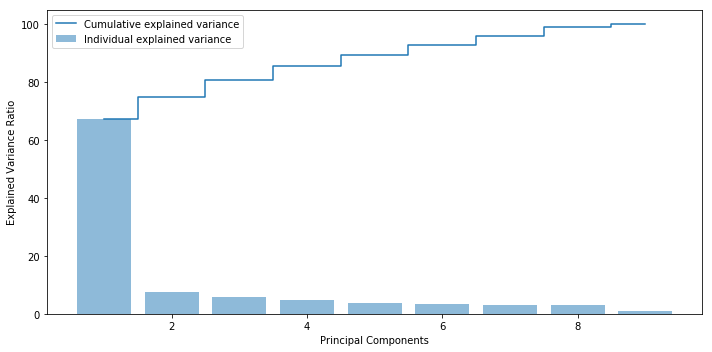

In [338]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

That means by considering eigen vector corresponding to largest eigen value we can retain 65.555% variance, considering eigen vectors corresponding to top 6 eigen values we can retain 92.816 % variance. 

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [339]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA



pca = PCA(n_components=6)
data_reduced = pca.fit_transform(X_Scaled)
data_reduced.transpose()

array([[-1.51993163,  2.02656929, -1.64131916, ...,  4.37818213,
         2.15755174,  2.61686225],
       [-0.01554675, -1.04861149, -0.09848716, ..., -0.17179329,
        -1.13317021, -1.38004262],
       [-0.6424235 ,  0.70480106, -0.05287667, ...,  1.18796708,
         0.59959759,  0.69927154],
       [ 0.05139879, -0.5201333 , -0.20792153, ...,  2.22485641,
         0.55171577,  0.22453086],
       [-0.14064673,  2.55918151, -0.21971778, ..., -0.08520789,
        -1.32206449, -0.3779373 ],
       [ 0.17175113,  0.92787557,  0.11280921, ..., -0.50732108,
        -0.52213342, -1.05108632]])

In [340]:
pca.explained_variance_

array([6.05535743, 0.68985206, 0.53331052, 0.42963306, 0.34608021,
       0.31800996])

In [341]:
pca.components_

array([[ 0.30126851,  0.37315411,  0.36904552,  0.33872008,  0.33605014,
         0.33481317,  0.34304877,  0.33905756,  0.2477809 ],
       [ 0.08140355, -0.06898757, -0.09720942, -0.15719809, -0.09904432,
        -0.09076495, -0.24212598,  0.0146176 ,  0.93678522],
       [-0.8660851 ,  0.00493646, -0.06975822,  0.30971654,  0.27553652,
        -0.09294726,  0.03778321,  0.2036284 ,  0.14707146],
       [ 0.10455826,  0.21021572,  0.19392752, -0.36355276,  0.33565873,
        -0.66882602, -0.17298862,  0.41467714, -0.11498351],
       [ 0.1429248 , -0.01193064, -0.0238922 ,  0.22599438,  0.64463744,
         0.08118753, -0.54882434, -0.4506501 , -0.0366518 ],
       [ 0.18414017, -0.51028785, -0.50738037, -0.09861242,  0.30735479,
         0.25977103,  0.01667423,  0.52111557, -0.06893508]])

# Q10 Find correlation between components and features

C:\Users\rtaralekar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


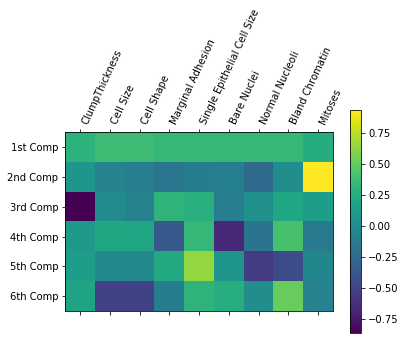

In [342]:
import matplotlib.pyplot as plt 
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X1.columns)),X1.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [408]:
jokes = pd.read_csv('jokes.csv') 
jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [409]:
ratings= jokes.drop(['NumJokes'],axis=1).head(200)

In [410]:
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 Change the column indices from 0 to 99

In [411]:
ratings.columns = range(100)
# iterating the columns 
for col in ratings.columns: 
    print(col) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [419]:
ratings_diff =ratings.replace(99,0)
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [420]:

ratings_T=ratings_diff.T
ratings_diff
ratings_diff.shape

(200, 100)

In [421]:
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings)
ratings_diff = pd.DataFrame(ratings_diff)

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [422]:
ratings_diff.mean(axis = 1)

0     -0.292128
1     -0.634802
2      0.687188
3      0.481516
4     -0.386405
5     -0.970044
6      0.663724
7     -0.816641
8     -0.798777
9      0.080589
10     1.028128
11    -0.646248
12     0.653011
13    -0.548985
14    -0.759706
15    -0.693386
16     0.415940
17    -0.540702
18     0.465375
19     0.311849
20     0.256176
21     0.414249
22     0.015008
23    -0.721551
24    -0.053554
25     0.166206
26     0.200543
27    -0.198395
28     0.406371
29     0.612409
         ...   
170    0.665289
171   -0.008394
172    0.728894
173    0.678498
174    0.870085
175    0.025852
176   -0.549896
177    0.511848
178    0.548747
179    0.660229
180    0.692561
181    0.004508
182   -0.239455
183    0.376193
184    0.115379
185    0.072204
186   -0.166225
187    0.540227
188    0.792802
189   -0.043351
190    0.140133
191   -0.117166
192   -0.601366
193   -0.548191
194   -0.788474
195   -0.558050
196   -0.029577
197   -0.730440
198    0.665178
199    0.016201
Length: 200, dtype: floa

In [424]:
#top 10 joke IDs
ratings_diff.mean(axis = 1).sort_values(ascending=False).head(10)

127    1.204587
126    1.149647
10     1.028128
124    1.009344
52     0.879230
174    0.870085
80     0.867129
116    0.824423
162    0.815493
188    0.792802
dtype: float64